# Task 1-II : Linear Models
# Analysis of bike sharing demand

**Note**
1. [Must read the data set information.](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)
2. You will understand how to handle the categorical data by doing this task.


In [ ]:
###################
## Run this cell ##
###################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_path = 'https://raw.githubusercontent.com/RayleighKim/Example_datasets/master/Bike-Sharing-Dataset/hour.csv'
rides = pd.read_csv(data_path)
print("some rows are lost (specific times like 2am, 3am)")
rides.head(5)

some rows are lost (specific times like 2am, 3am)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


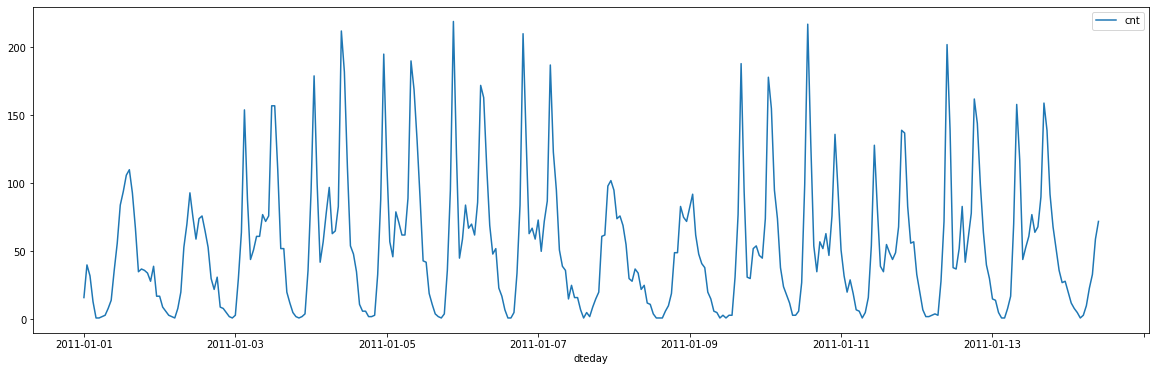

In [ ]:
###################
## Run this cell ##
###################
days = 14
rides[:24*days].plot(x='dteday', y='cnt', figsize=(20,6))
plt.show()

# Q1. Drop these columns in rides (dataframe)

* columns to drop : instant, dteday, atemp, workingday, casual, registered

In [ ]:
####################
## Your code here ##
####################

cols_to_drop = ['instant', 'dteday', 'atemp', 'workingday', 'casual', 'registered']

rides = rides.drop(cols_to_drop, axis =1)
rides.head()

,season,yr,mnth,hr,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,1,0.24,0.81,0.0,16
1,1,0,1,1,0,6,1,0.22,0.80,0.0,40
2,1,0,1,2,0,6,1,0.22,0.80,0.0,32
3,1,0,1,3,0,6,1,0.24,0.75,0.0,13
4,1,0,1,4,0,6,1,0.24,0.75,0.0,1


# Q2. Split the df into training set & validation set & test set

1. x : all columns in rides except 'cnt'
2. y : the column 'cnt' in rides
3. variable names :
    * x_train, y_train
    * x_valid, y_valid
    * x_test, y_test
4. split data into training set and test set first
    * test set size = 24 * 21 : last 3 weeks of data
    * you can use an integer argument to parameter 'test_size' for train_test_split
    * **shuffle = False**
5. split training set into training set and validation set
    * validation set size = 24 * 60 : last 60days of training data
    * like splitting data into training & test
5. randomstate : 2021

In [ ]:
###############################################
## Hint code will not be provided, next time ##
###############################################
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(rides.drop(['cnt'], axis=1), rides['cnt'],
                                                    test_size=24*21, random_state=2021 , shuffle=False)

#############################################################
## Split training set into training set and validation set ##
#############################################################

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train,
                                                    test_size=24*60, random_state=2021 , shuffle=False)

# Q3. Train linear regression model

1. declare your model as lr

In [ ]:
####################
## Your code here ##
####################
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Q4. Make a prediction
1. y_pred_train : prediction on training set
2. y_pred_valid : prediction on validation set
3. y_pred_test : prediction on test set

In [ ]:
####################
## Your code here ##
####################
y_pred_train = lr.predict(x_train)
y_pred_valid = lr.predict(x_valid)
y_pred_test = lr.predict(x_test)

# Q5. Evaluate the model on the training set & validation set

* Use RMSE

In [ ]:
####################
## Your code here ##
####################
from sklearn.metrics import mean_squared_error as MSE

rmse_train = MSE(y_train, y_pred_train )**.5
rmse_valid = MSE(y_valid, y_pred_valid )**.5

print(f"RMSE on training set : {rmse_train:.3f}")
print(f"RMSE on validation set     : {rmse_valid:.3f}")

RMSE on training set : 138.765
RMSE on validation set     : 175.706


# Q6. Analyze the effect of 'hr' (hour)

**assumption1 : every other features are fixed.**<br>
**assumption2 : use training set to anlayze.**
1. How does the 'cnt'(count of thotal rental bikes) change whenever 1 hour has passed ?
2. What is the change in the 'cnt' due to the maximum change of 'hr'
3. How does the effect of 'hr' change when changing from 23 o'clock to 0 o'clock?
4. Is this interpretation appropriate?
    * Write your answer, comparing the time series plot at the top of this file to this interpretation.


In [ ]:
####################
## Your code here ##
####################
coef_hr = lr.coef_[3]
max_ch_hr = x_train['hr'].max() - x_train['hr'].min()


print(f"A1 : {coef_hr:.3f}")
print(f"A2 : {coef_hr*max_ch_hr:.3f}")
print(f"A3 : -{coef_hr*max_ch_hr:.3f}")
print(f"A4 : No, the effect doesn't change linearly.")

A1 : 7.718
A2 : 177.515
A3 : -177.515
A4 : No, the effect doesn't change linearly.


# Q7. Make dummy variables into rides dataframe

1. Target columns are 'season', 'weathersit', 'mnth', 'hr', 'weekday'
2. Target columns should be dropped in rides dataframe
3. If the number of levels of the 'hr' column is 24, then the number of dummies of 'hr' should be 23


In [ ]:
####################
## Your code here ##
####################
dummy_cols = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
rides = pd.get_dummies(rides, columns=dummy_cols, drop_first=True)

rides.head()

,yr,holiday,temp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3,weathersit_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Q8. Split the df(with dummy vars) into training set & validation set & test set

1. x : all columns in rides except 'cnt'
2. y : the column 'cnt' in rides
3. variable names :
    * x_train_d, y_train_d ( actually, y_train_d = y_train )
    * x_valid_d, y_valid_d ( actually, y_valid_d = y_valid )
    * x_test_d, y_test_d ( actually, y_test_d = y_test )
4. split data into training set and test set first
    * test set size = 24 * 21 : last 3 weeks of data
    * you can use an integer argument to parameter 'test_size' for train_test_split
    * **shuffle = False**
5. split training set into training set and validation set
    * validation set size = 24 * 60 : last 60days of training data
    * like splitting data into training & test
5. randomstate : 2021

In [ ]:
###############################################
## Hint code will not be provided, next time ##
###############################################
from sklearn.model_selection import train_test_split

x_train_d, x_test_d, y_train_d, y_test_d = train_test_split(rides.drop(['cnt'], axis=1), rides['cnt'],
                                                    test_size=24*21, random_state=2021 , shuffle=False)

#############################################################
## Split training set into training set and validation set ##
#############################################################
from sklearn.model_selection import train_test_split

x_train_d, x_valid_d, y_train_d, y_valid_d = train_test_split(x_train_d, y_train_d,
                                                    test_size=24*60, random_state=2021 , shuffle=False)

# Q9. Train linear regression model on training set with dummy variables

1. declare your model as lr_d

In [ ]:
####################
## Your code here ##
####################
from sklearn.linear_model import LinearRegression
lr_d = LinearRegression()
lr_d.fit(x_train_d, y_train_d)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Q10. Make a prediction
1. y_pred_train_d : prediction on training set
2. y_pred_valid_d : prediction on validation set
3. y_pred_test_d : prediction on test set

In [ ]:
####################
## Your code here ##
####################
y_pred_train_d = lr_d.predict(x_train_d)
y_pred_valid_d = lr_d.predict(x_valid_d)
y_pred_test_d = lr_d.predict(x_test_d)

# Q11. Evaluate the model(lr_d) on the training set & validation set which have dummy variables

* Use RMSE
* Question : Describe the change of error, comparing the result of Q5 to the result of Q11

In [ ]:
####################
## Your code here ##
####################
from sklearn.metrics import mean_squared_error as MSE

rmse_train_d = MSE(y_train_d, y_pred_train_d )**.5
rmse_valid_d = MSE(y_valid_d, y_pred_valid_d )**.5

print(f"RMSE on training(dummy) set : {rmse_train_d:.3f}")
print(f"RMSE on validation(dummy) set     : {rmse_valid_d:.3f}")

print("Errors decrease")

RMSE on training(dummy) set : 99.538
RMSE on validation(dummy) set     : 123.339
Errors decrease


# Q12. Analyze the effect of dummy variables of 'hr'

**assumption1 : every other features are fixed.**<br>
**assumption2 : use training set to anlayze.**

1. Print all the effects that each time(0~23) has on the 'cnt'
    * example
```
     hr_0 : 29
     hr_1 : 11
     ~
     hr_23 : -2
```
2. write your interpretation of the result by referring to
    * the time series plot at the top
    * the results of Q5, Q11
    * the interpretation of Q6


In [ ]:
## the names of columns
x_train_d.columns[22:45]

Index(['hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9',
       'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17',
       'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23'],
      dtype='object')

In [ ]:
####################
## Your code here ##
####################

for i in range(22, 45):
    col_name = x_train_d.columns[i]
    coeff = lr_d.coef_[i]
    print(f"{col_name} : {coeff:.2f}")

"""
The current result, which reflects the peak of commute time, is more appropriate
The errors also decreased
"""

hr_1 : -17.75
hr_2 : -26.18
hr_3 : -37.16
hr_4 : -40.39
hr_5 : -24.08
hr_6 : 34.16
hr_7 : 165.98
hr_8 : 300.13
hr_9 : 158.06
hr_10 : 106.02
hr_11 : 130.69
hr_12 : 168.24
hr_13 : 164.03
hr_14 : 148.54
hr_15 : 156.76
hr_16 : 217.98
hr_17 : 373.66
hr_18 : 345.55
hr_19 : 239.52
hr_20 : 159.83
hr_21 : 110.20
hr_22 : 72.97
hr_23 : 32.70


'\nThe current result, which reflects the peak of commute time, is more appropriate\nThe errors also decreased\n'

# Q13. Evaluate the model(lr_d) on the test set which have dummy variables

* Use RMSE

In [ ]:
####################
## Your code here ##
####################
from sklearn.metrics import mean_squared_error as MSE

rmse_test_d = MSE(y_test_d, y_pred_test_d )**.5

print(f"RMSE on test(dummy) set : {rmse_test_d:.3f}")

RMSE on test(dummy) set : 108.780
